# Import

In [1]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.metrics import pairwise_distances
from PIL import Image
from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot

In [2]:
RANDOM_STATE = 42

In [3]:
ds = DataSetFactory.get_dataset('vgg_features_imagenet', RANDOM_STATE ,sample=0.15, is_subset=[0, 2, 3, 8])

(7890, 4097) 7890
Taking sample of 0.15 from the data


../src\DataSetFactory.py:506: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
ds.class_to_label

{0: 'Norwegian_elkhound',
 1: 'Maltese_dog',
 2: 'Scottish_deerhound',
 3: 'Rhodesian_ridgeback'}

In [5]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

# Blobs

In [6]:
cp = ClusterPlot(learning_rate=0.4, 
#             n_iter=23, 
#             batch_size=1,
            n_iter=21, 
            batch_size=1,
            anchors_method='birch',
            birch_threshold=35,
            umap_n_neighbors=15,
            dataset='VGGAnimals',
            class_to_label=ds.class_to_label,
            show_fig=True,
            save_fig=True,
            k=20,
            random_state=RANDOM_STATE,
            save_fig_every=20,
            magnitude_step=True,
            top_greedy=5,
            show_anchors=False,
            supervised=False,
#             alpha=[1,0,1,1],
#             douglas_peucker_tolerance=1,
            alpha=0,
            douglas_peucker_tolerance=0.3,
            smooth_iter=3,
            show_inner_blobs=True,
            random_points_method='voronoi',
            orig_images=ds.orig_images,
            annotate_images=False,
            stop_criteria=0,
            mask_sparse_subcluster=None,
            only_inter_relations=False,
            mask_relation_in_same_label=True)
print(cp)


AMAP
addr:@577488
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=35
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=5
magnitude_step=True
n_iter=21
batch_size=1
stop_criteria=0
loss_func=<function AMAP.l_inf_loss at 0x000001E213825048>
loss='Linf'
only_inter_relations=False
learning_rate=0.4
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Norwegian_elkhound', 1: 'Maltese_dog', 2: 'Scottish_deerhound', 3: 'Rhodesian_ridgeback'}
random_state=42
n_jobs=None
dataset='VGGAnimals'
show_fig=True
save_fig=True
is_plotly=False
do_animation=False
use_spline=False
alpha=0
douglas_peucker_tolerance=0.3
smooth_iter=3
skip_polygons_with_area=0.01
mask_relation_in_same_label=True
save_fig_every=20
show_points=False
show_anchors=False
show_

finding intra class anchors using birch
UnSupervised Dim Reduction
Dim Reduction only anchors


  0%|                                                                                          | 0/688 [00:00<?, ?it/s]

Dim Reduction only anchors - generate random points in low dim per anchor


100%|███████████████████████████████████████████████████████████████████████████████| 688/688 [00:01<00:00, 615.11it/s]


Starting iteration 1 loss = 0.5128205128205128
src: 113 target 80 dir -1 density 1loss: -0.5128205128205128
src: 80 target 113 dir -1 density 20loss: -0.43478260869565216
src: 63 target 89 dir 1 density 1loss: 0.3157894736842105
src: 23 target 89 dir 1 density 5loss: 0.2727272727272727
src: 1 target 130 dir 1 density 1loss: 0.2631578947368421


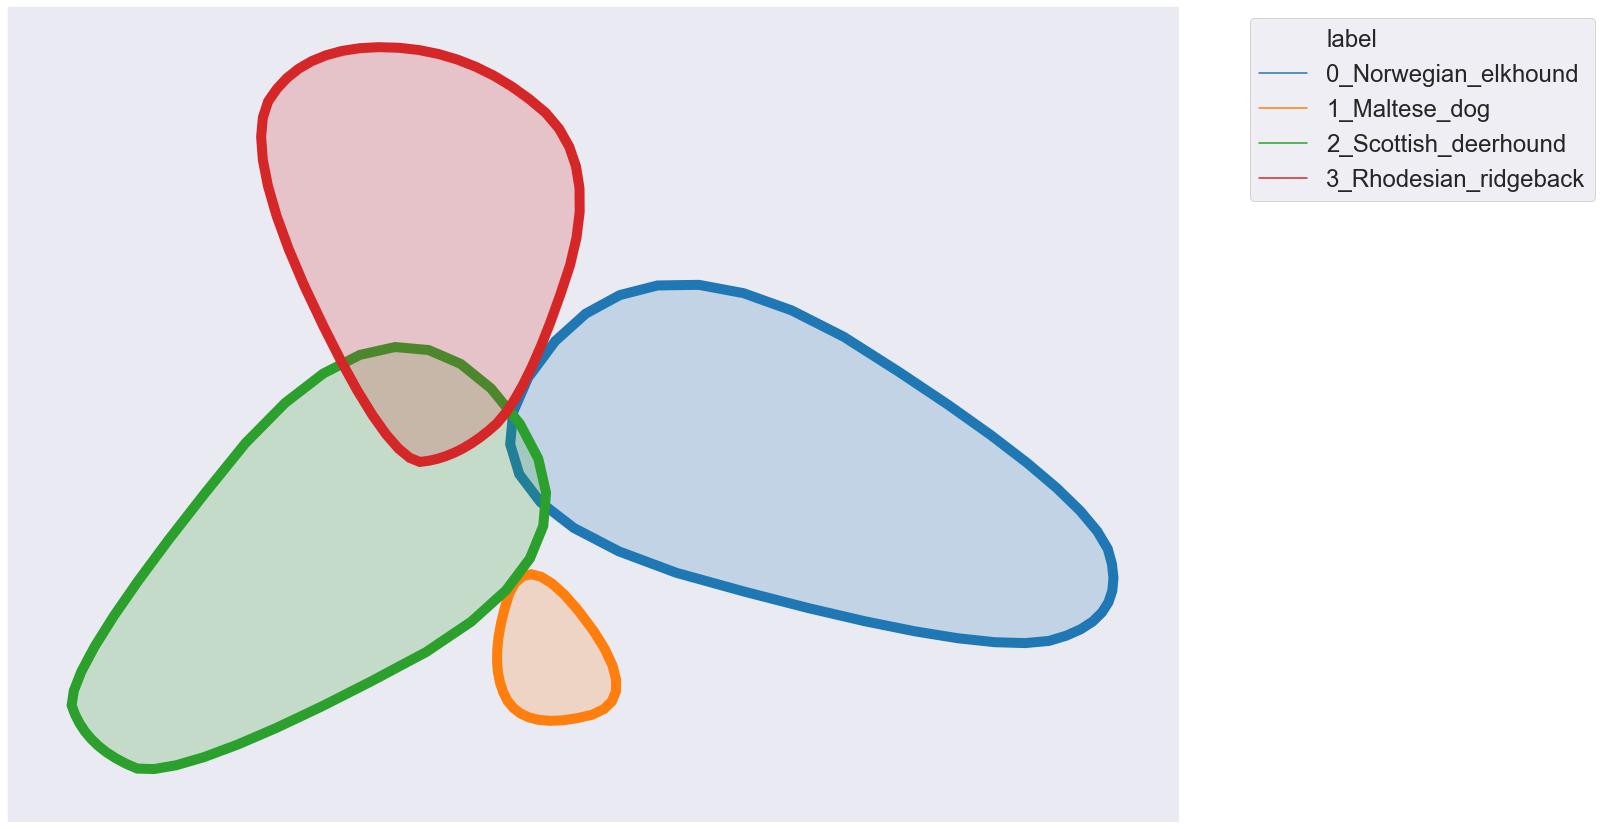

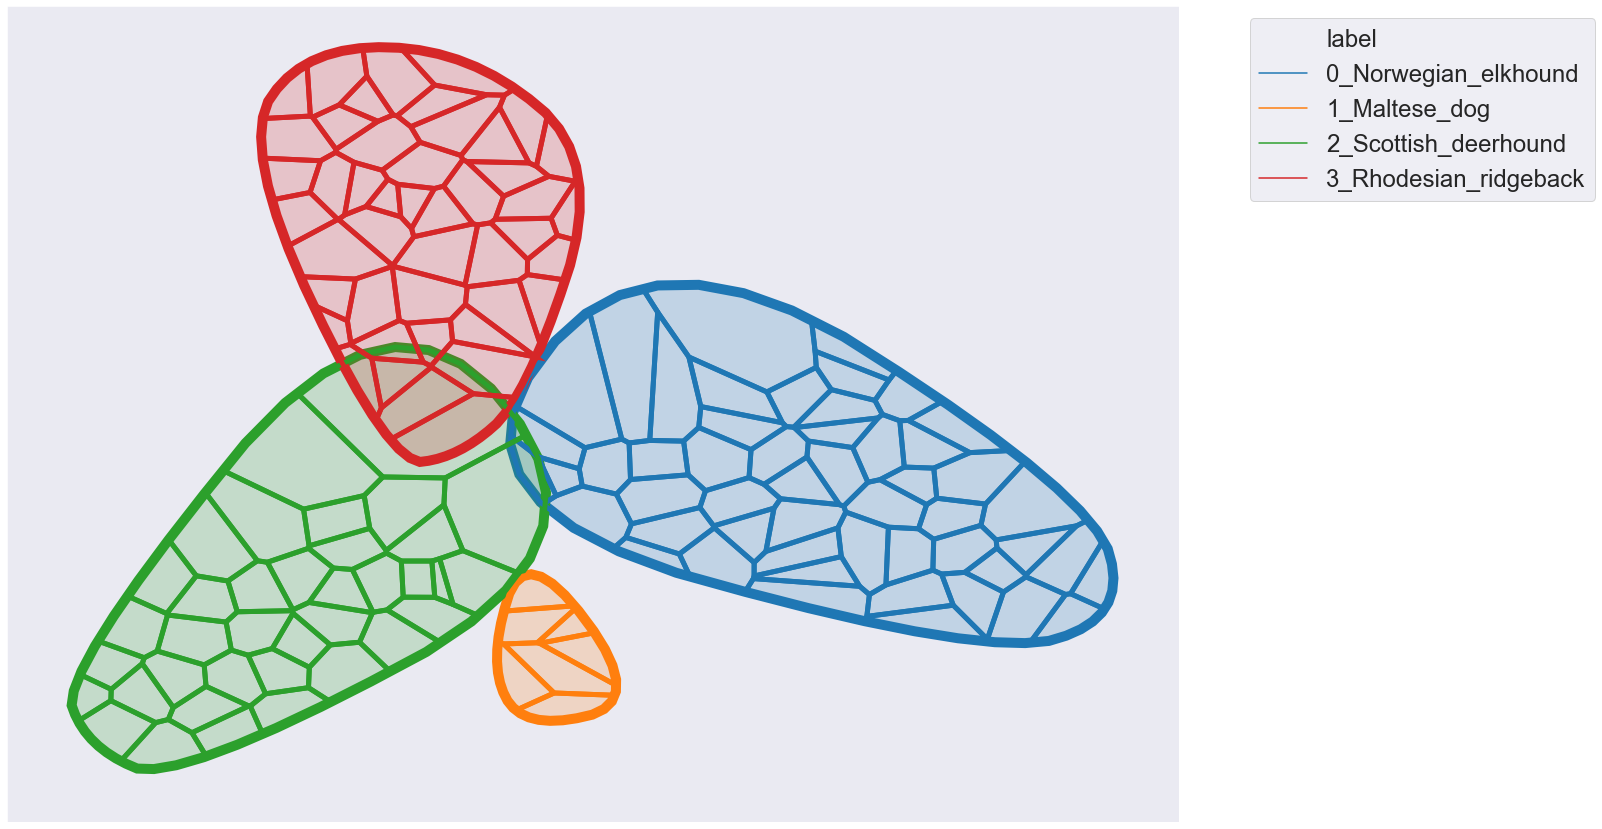

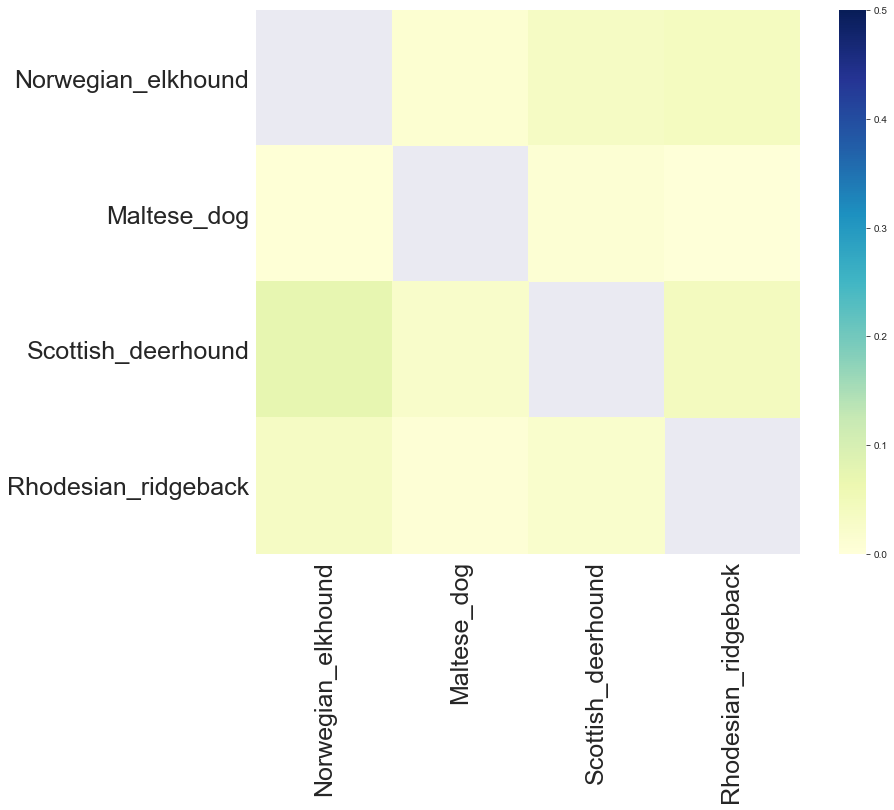

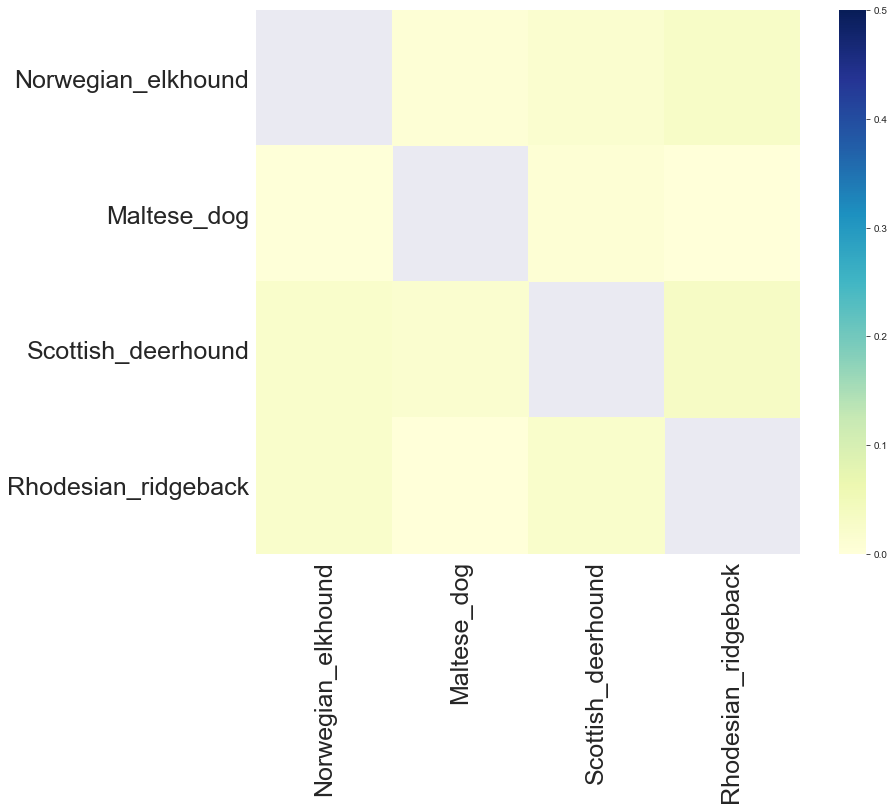

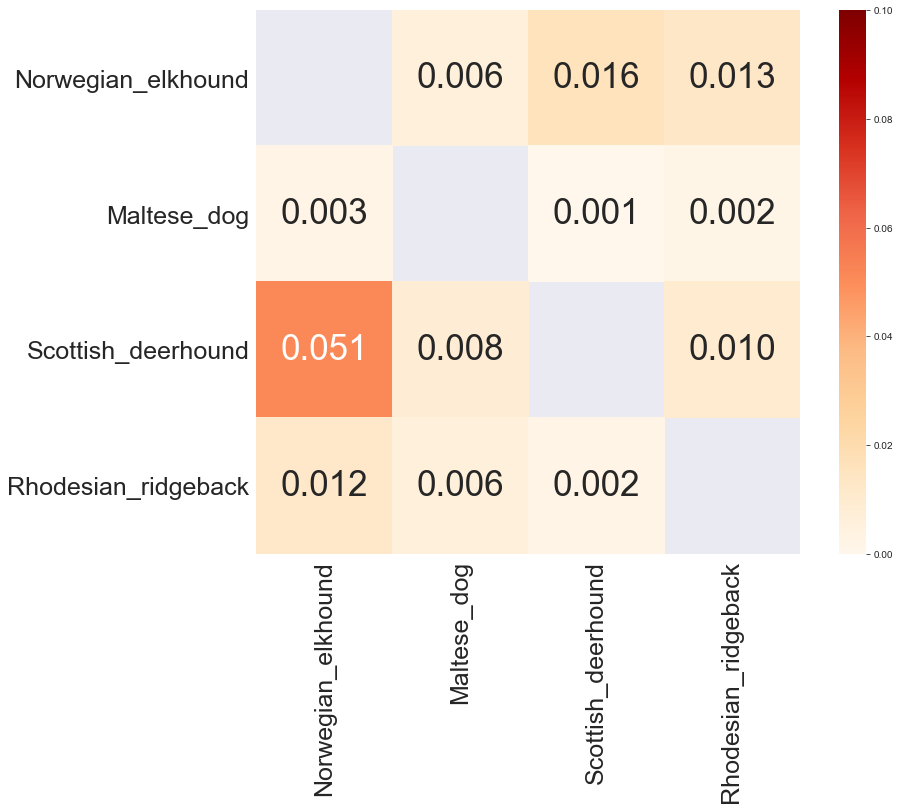

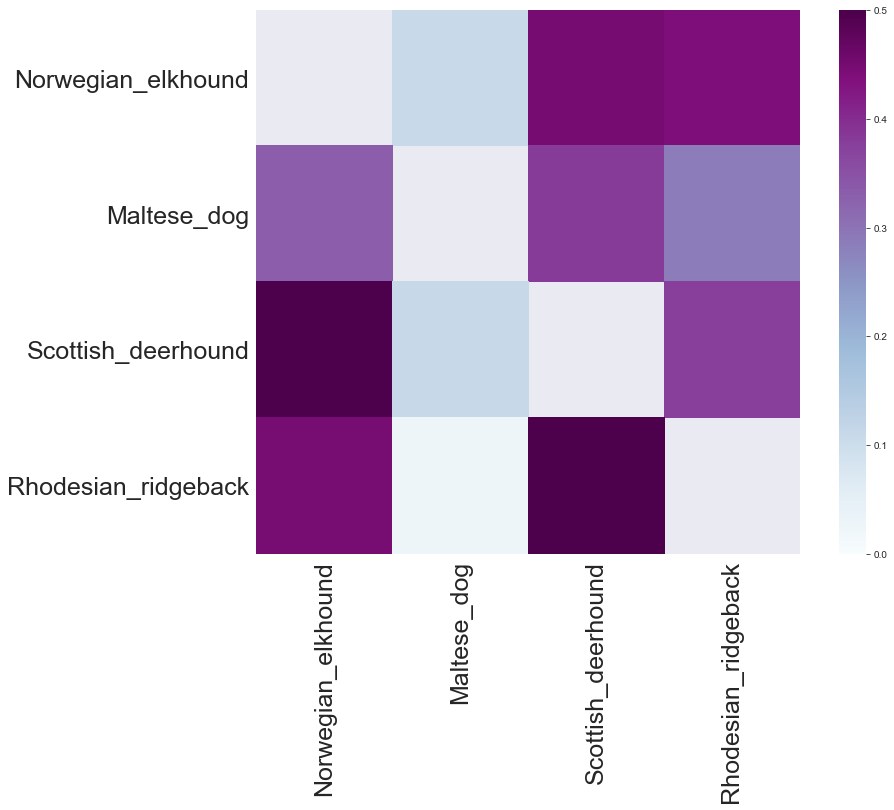

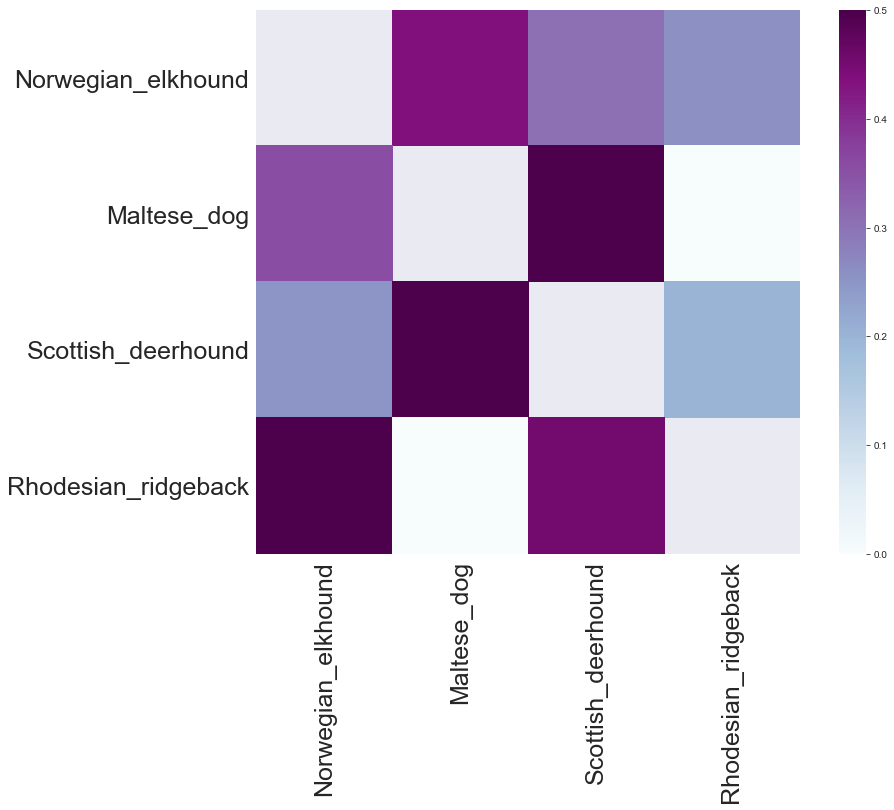

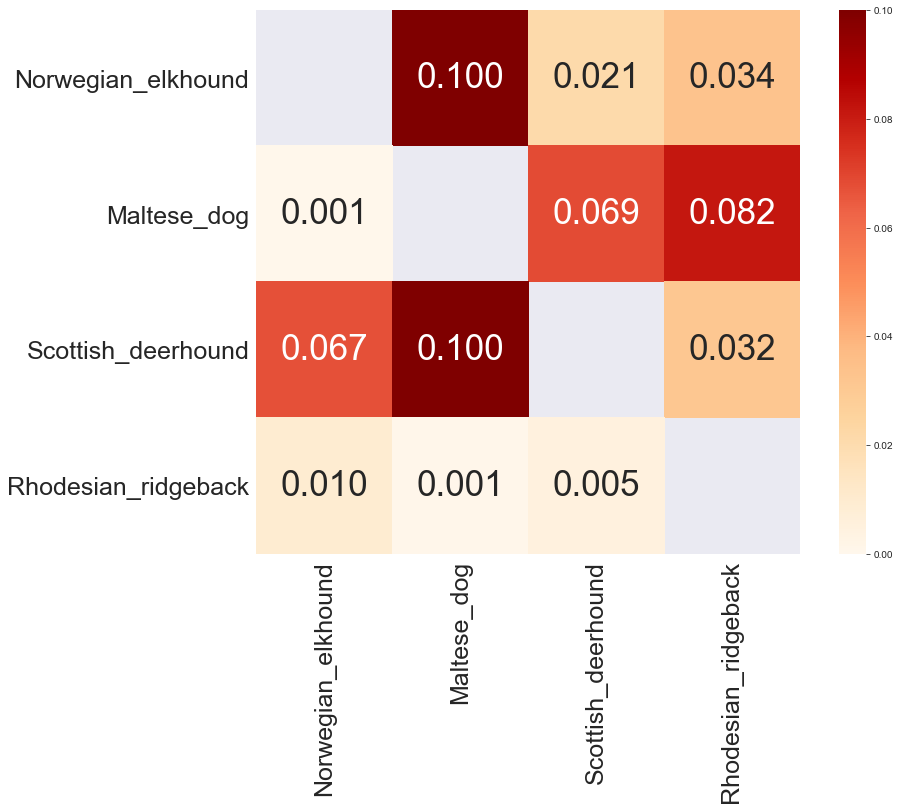

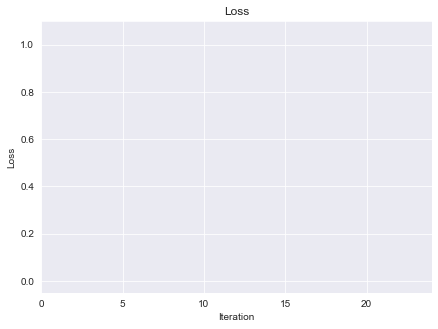

Starting iteration 2 loss = 0.275
src: 113 target 80 dir -1 density 1loss: -0.275
src: 1 target 130 dir 1 density 1loss: 0.2631578947368421
src: 71 target 89 dir 1 density 2loss: 0.24933862433862433
src: 62 target 89 dir 1 density 1loss: 0.23684210526315788
src: 23 target 89 dir 1 density 5loss: 0.22828282828282825
Starting iteration 3 loss = 0.2631578947368421
src: 1 target 130 dir 1 density 1loss: 0.2631578947368421
src: 89 target 23 dir 1 density 16loss: 0.21875
src: 63 target 89 dir 1 density 1loss: 0.21052631578947367
src: 23 target 89 dir 1 density 5loss: 0.20606060606060606
src: 71 target 89 dir 1 density 2loss: 0.19378306878306878
Starting iteration 4 loss = 0.23684210526315788
src: 1 target 130 dir 1 density 1loss: 0.23684210526315788
src: 146 target 23 dir 1 density 5loss: 0.1782178217821782
src: 107 target 23 dir 1 density 1loss: 0.15789473684210525
src: 167 target 23 dir 1 density 1loss: 0.15789473684210525
src: 180 target 23 dir 1 density 1loss: 0.15789473684210525
Startin

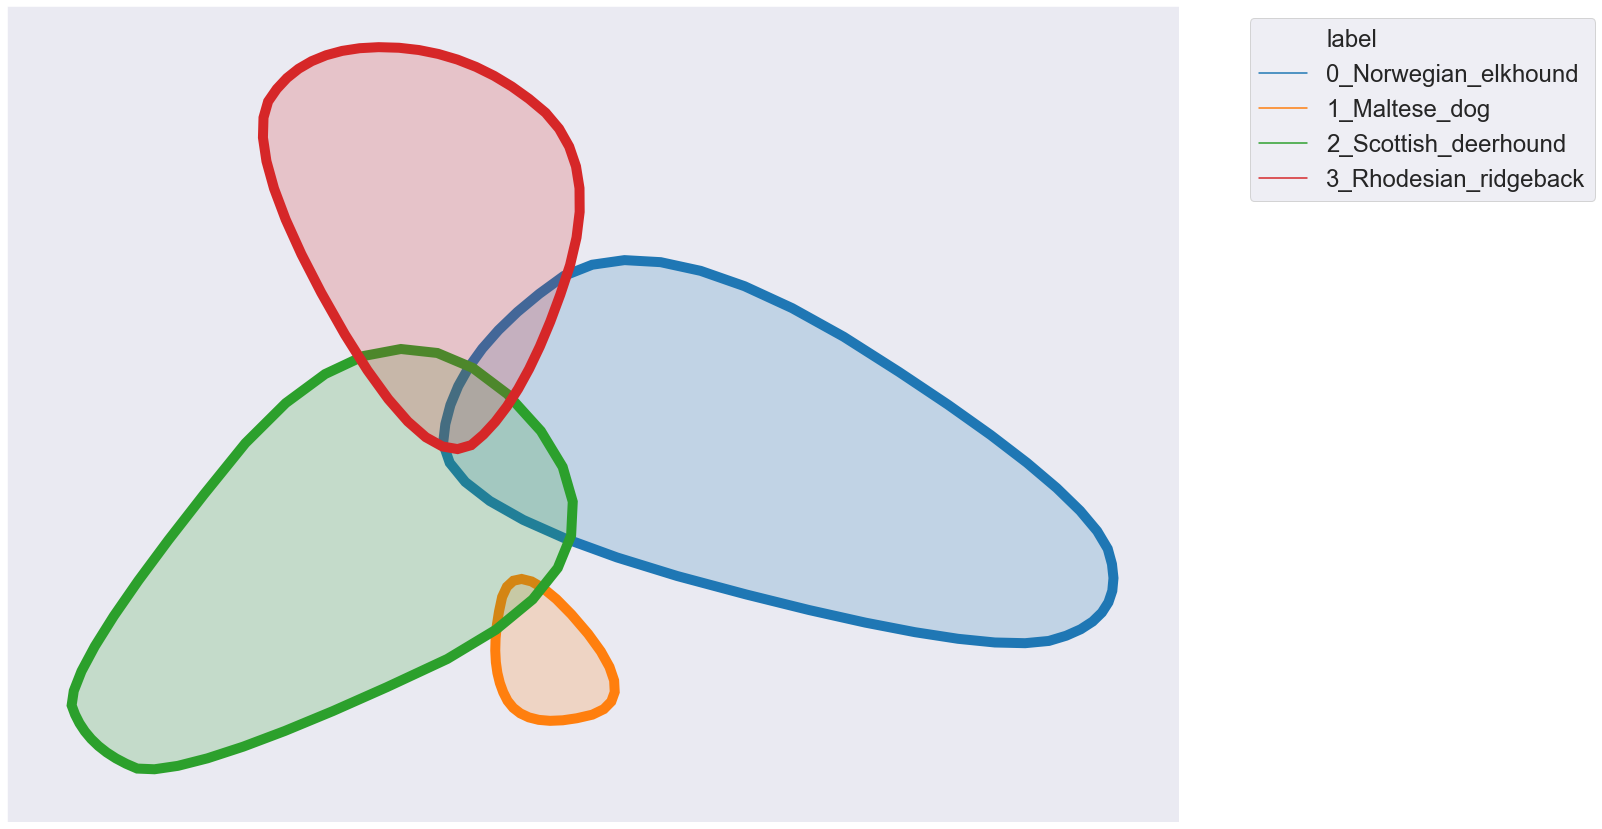

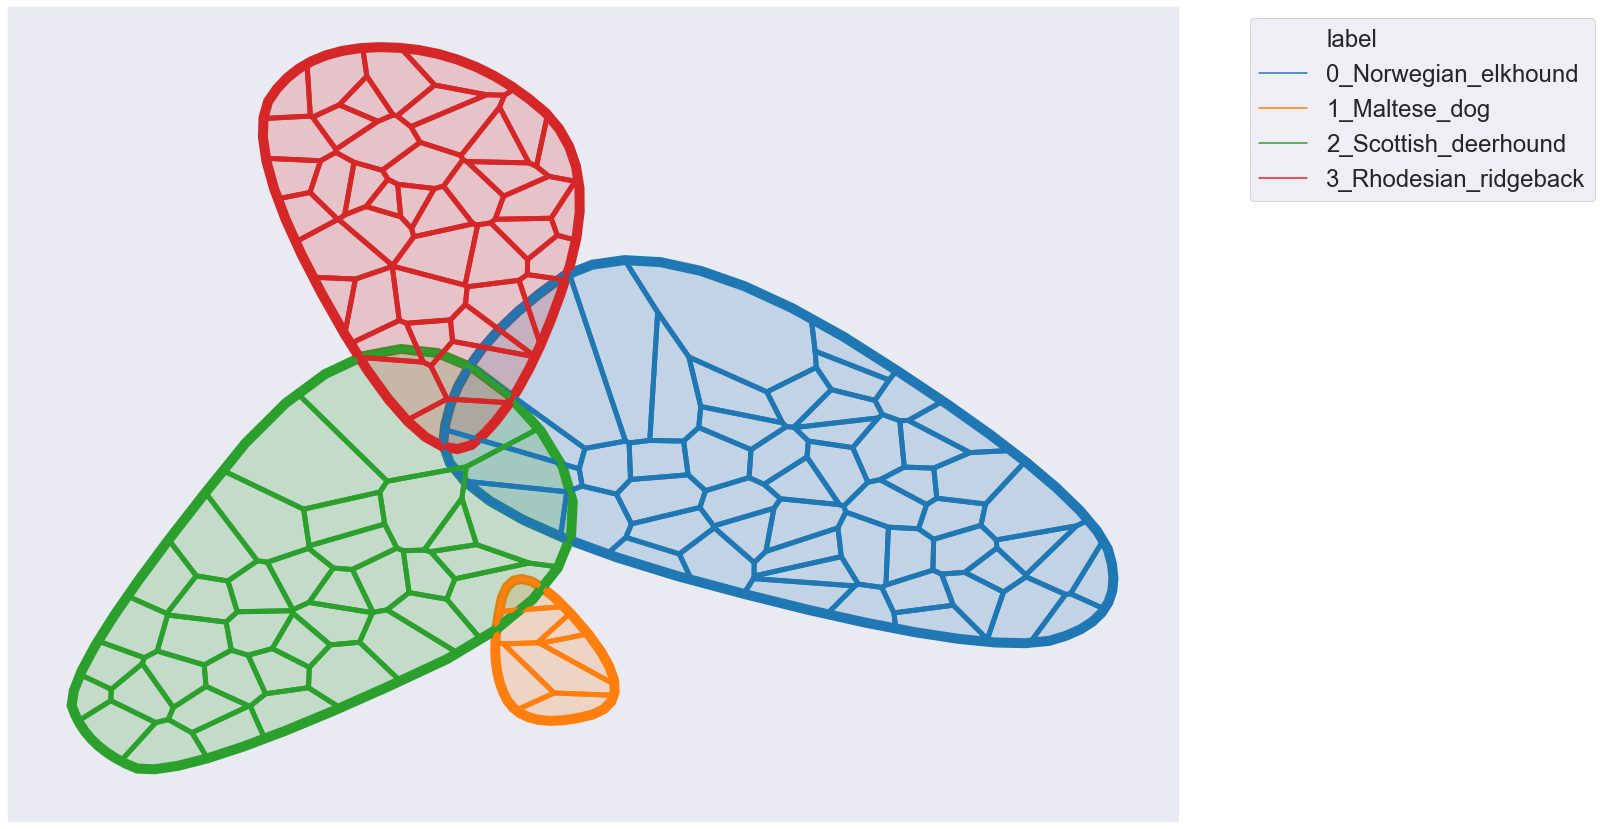

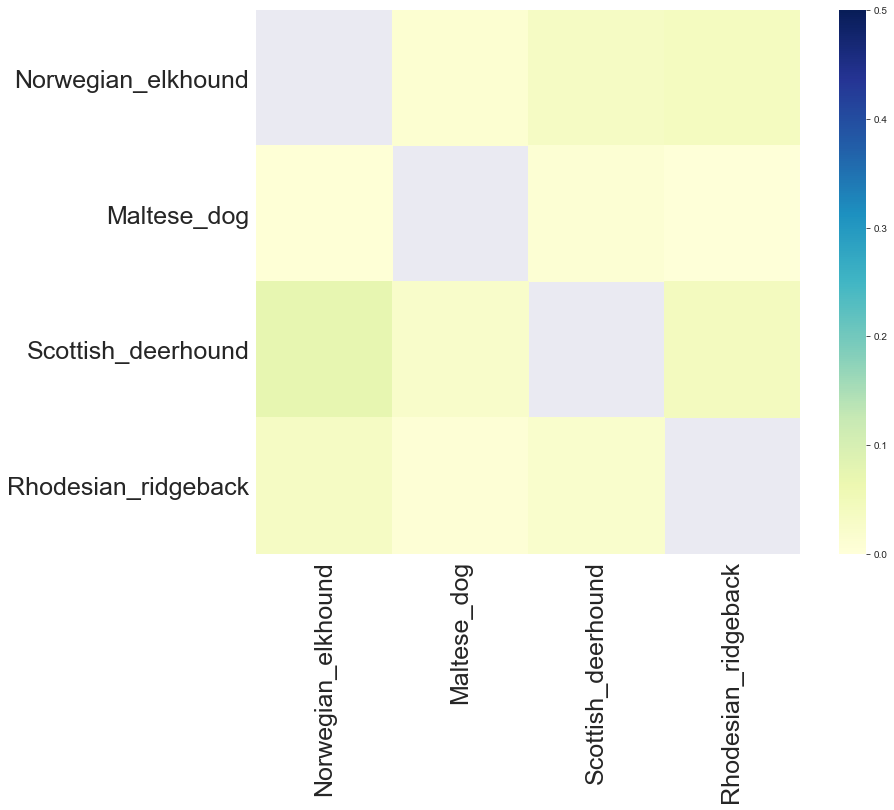

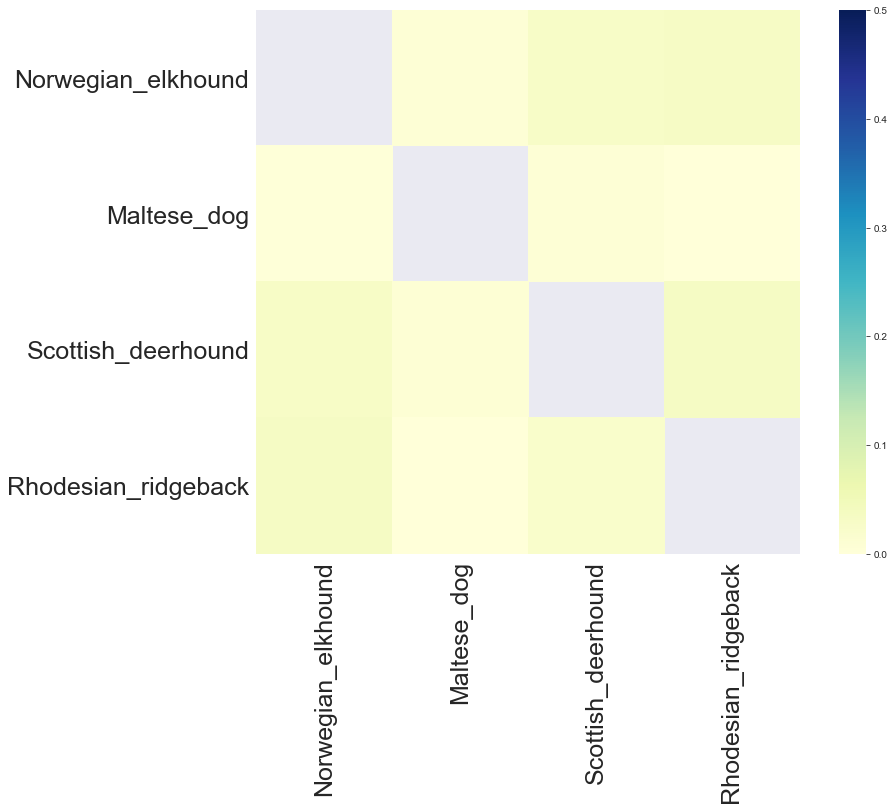

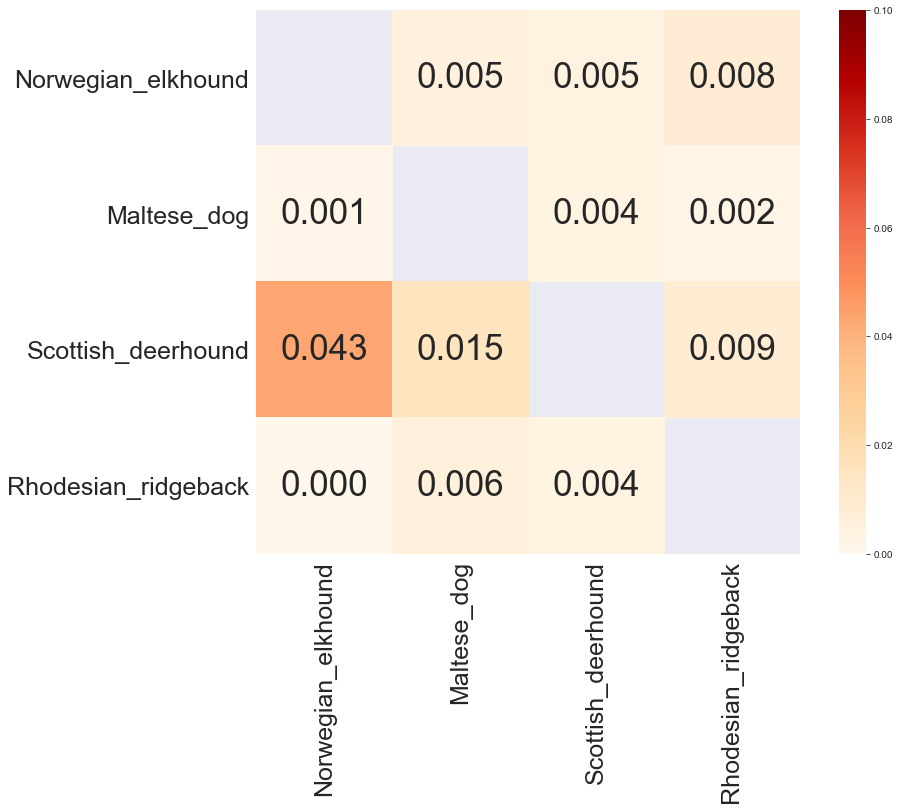

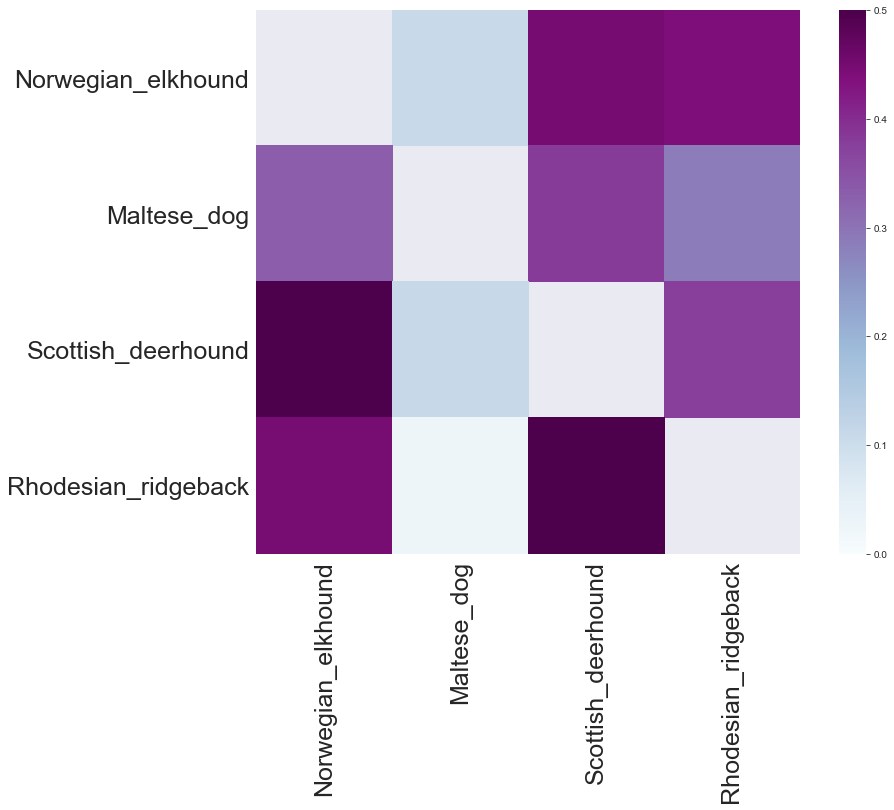

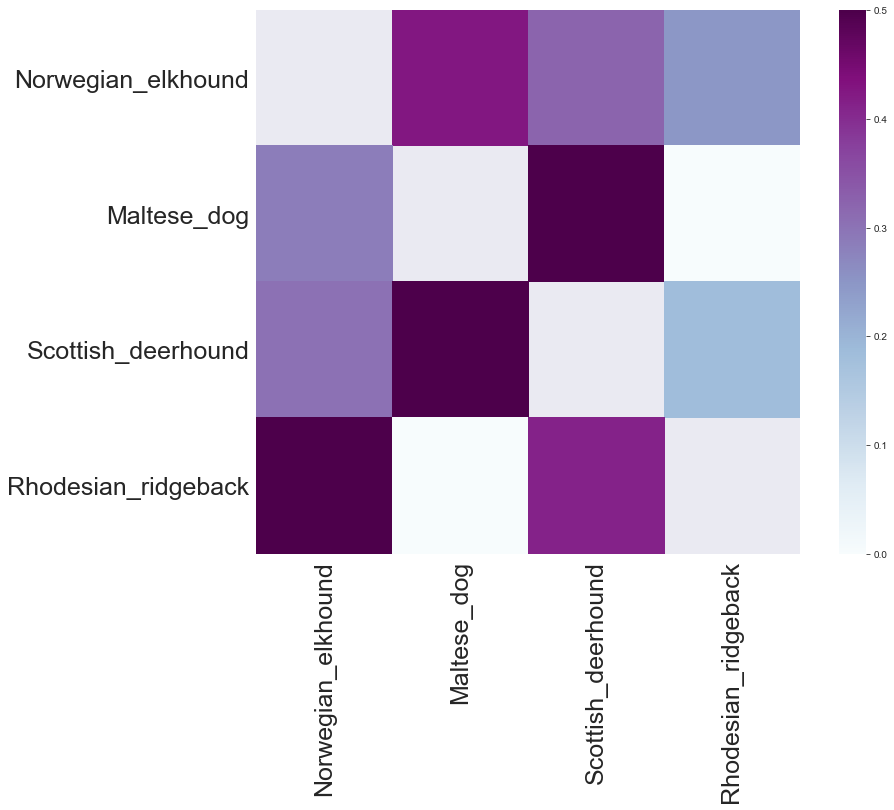

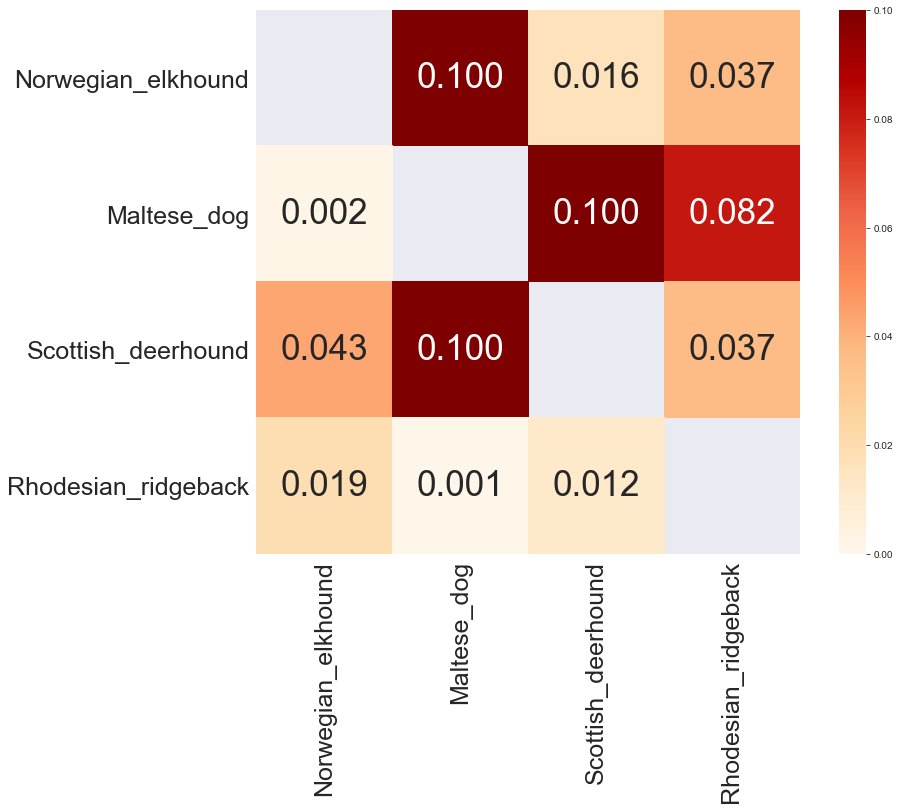

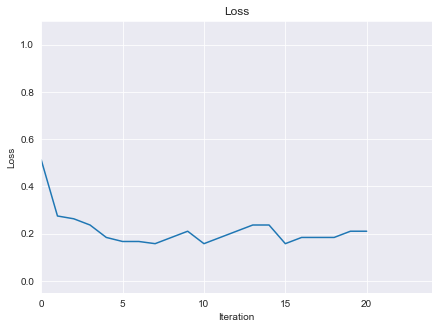

In [7]:
low_dim = cp.fit_transform(X, y)

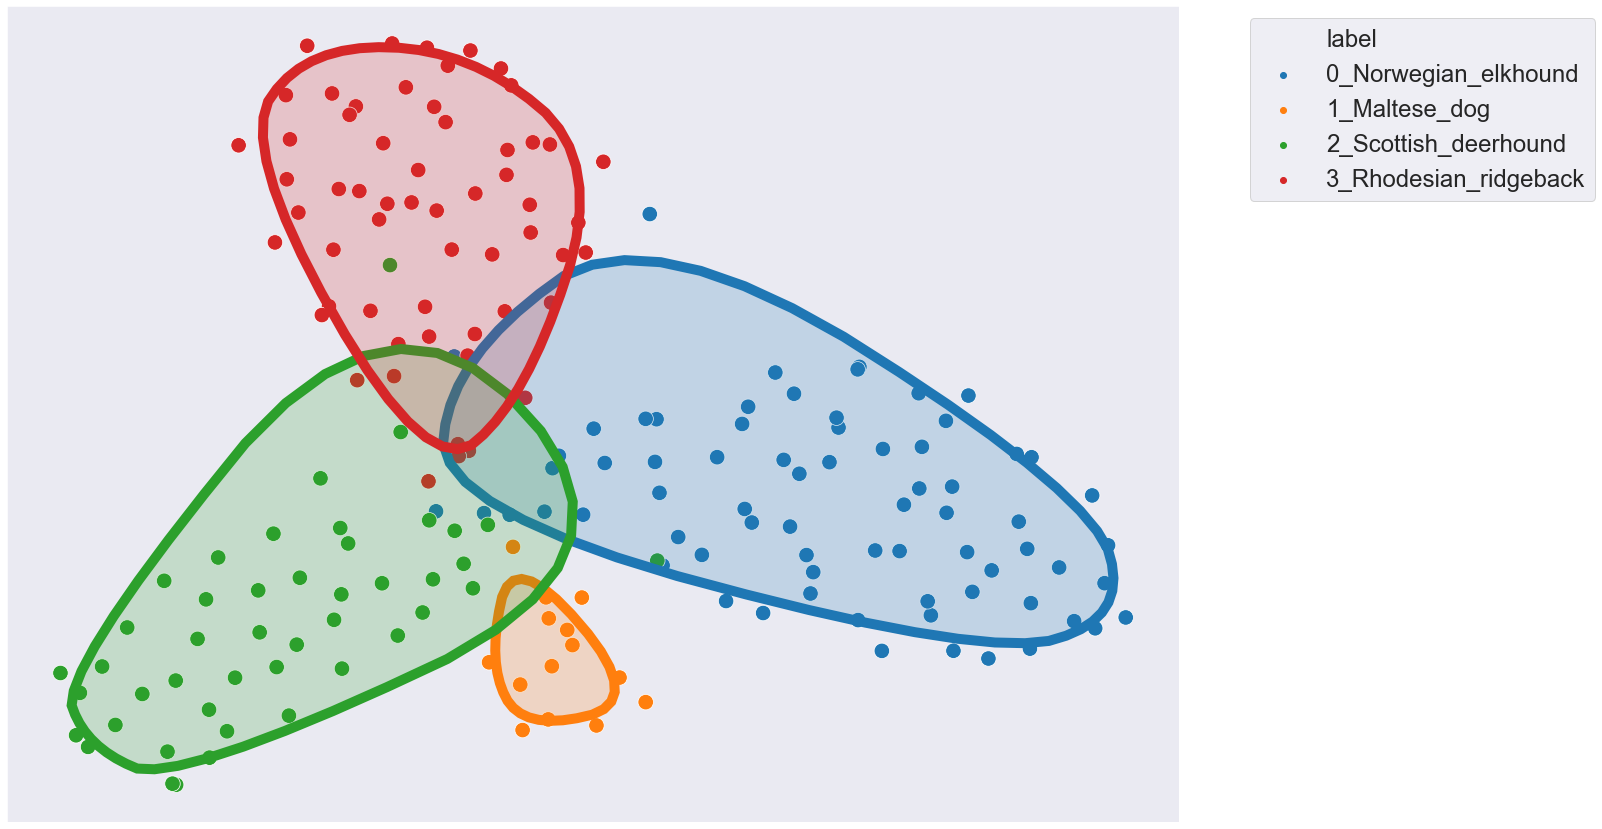

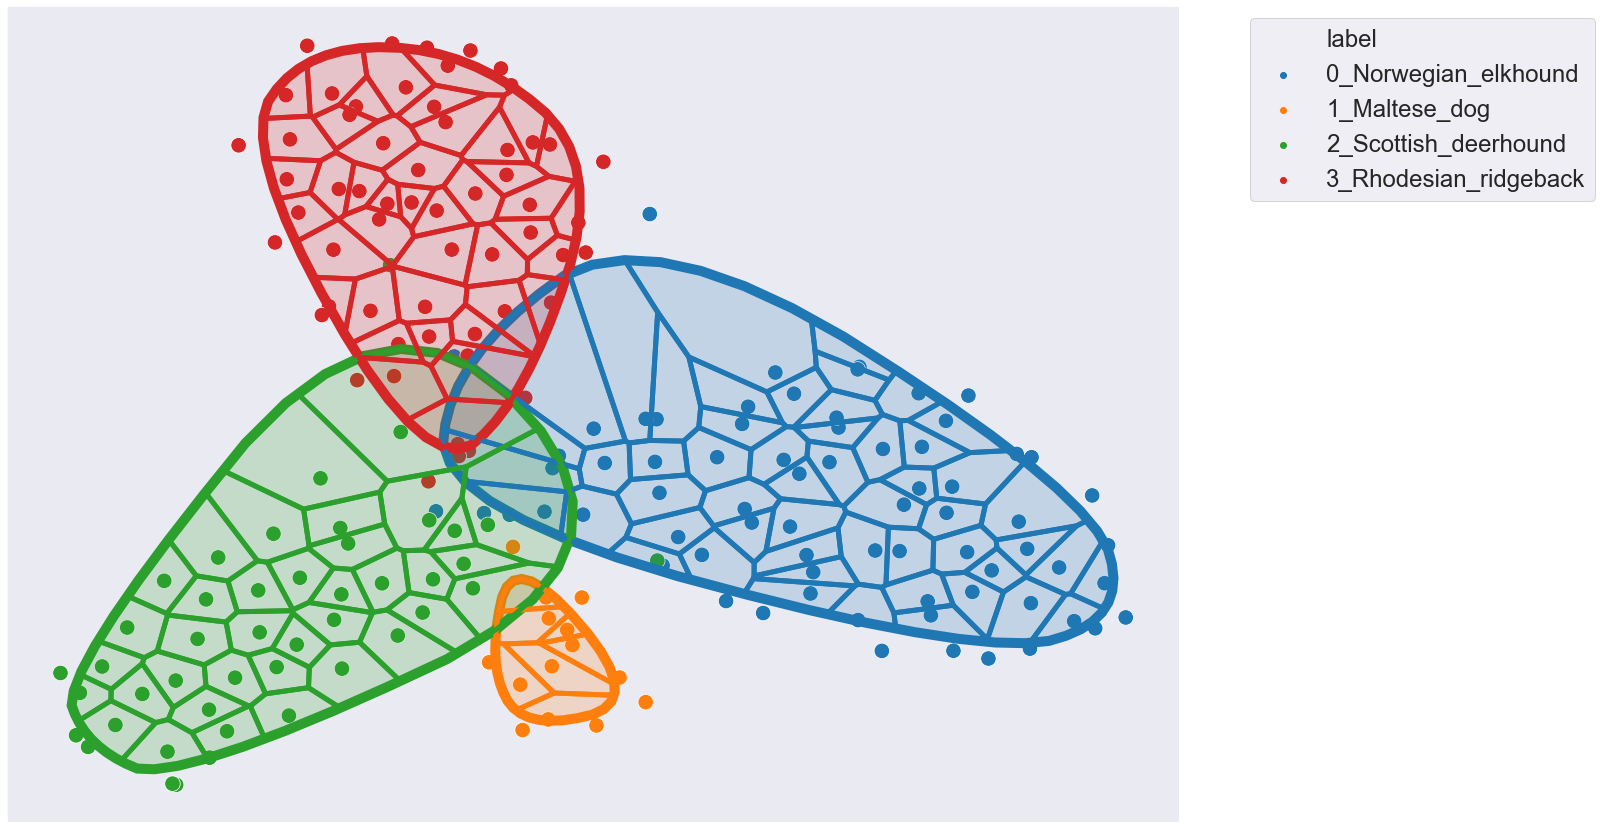

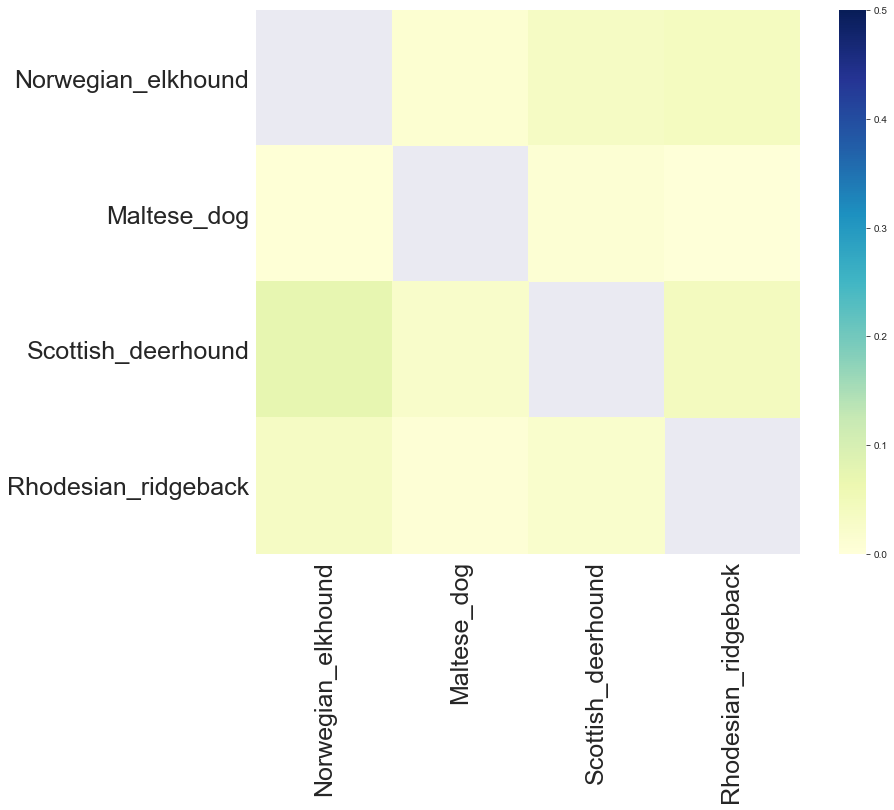

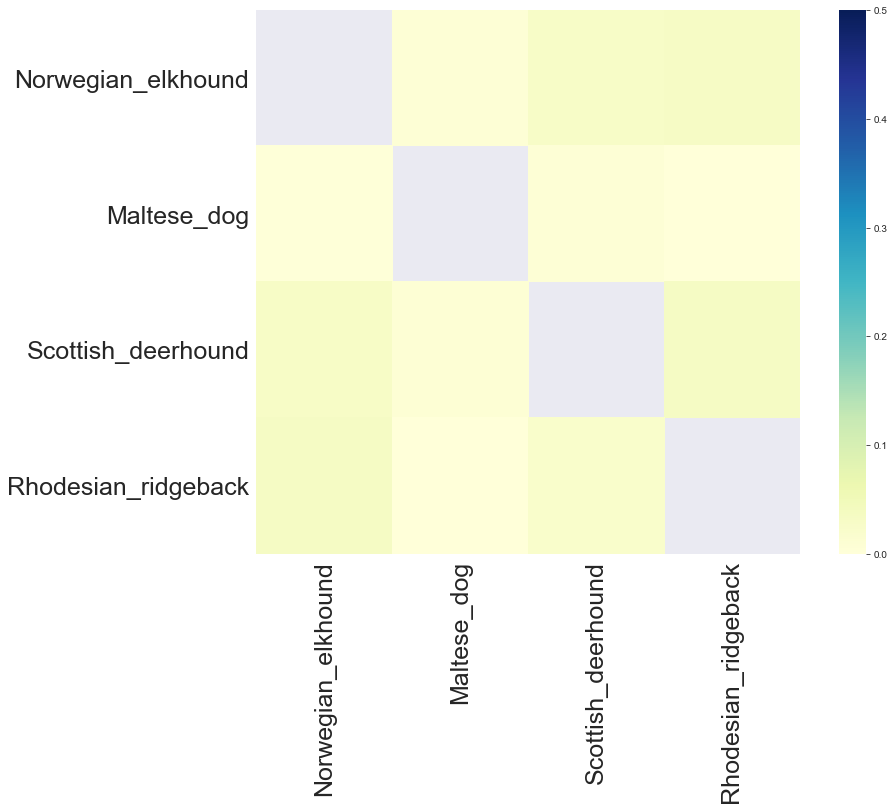

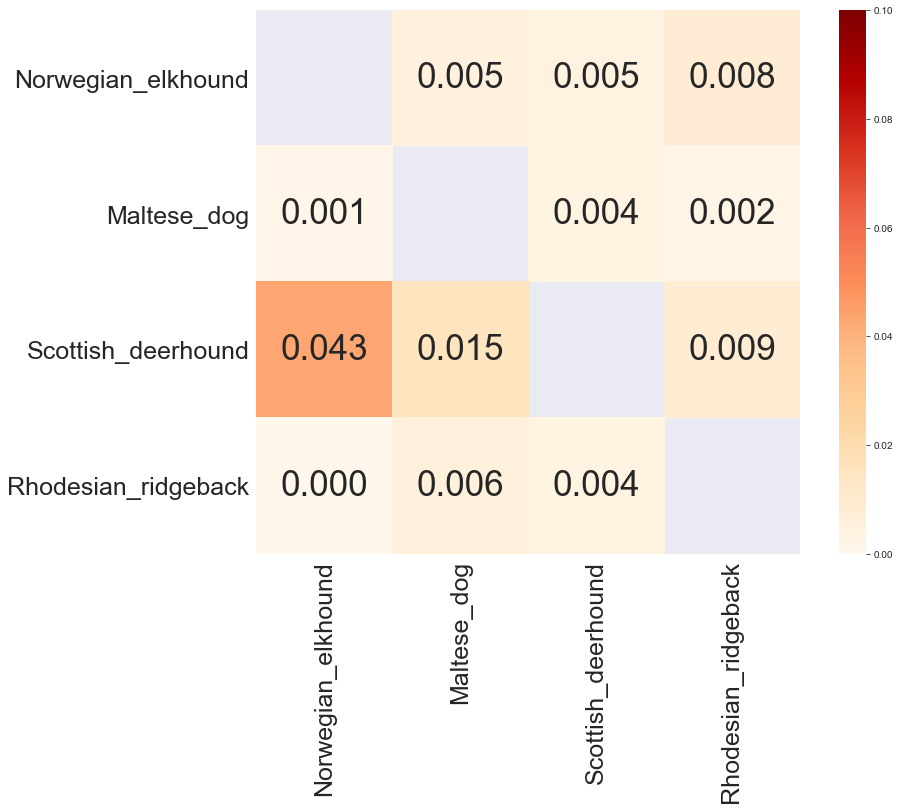

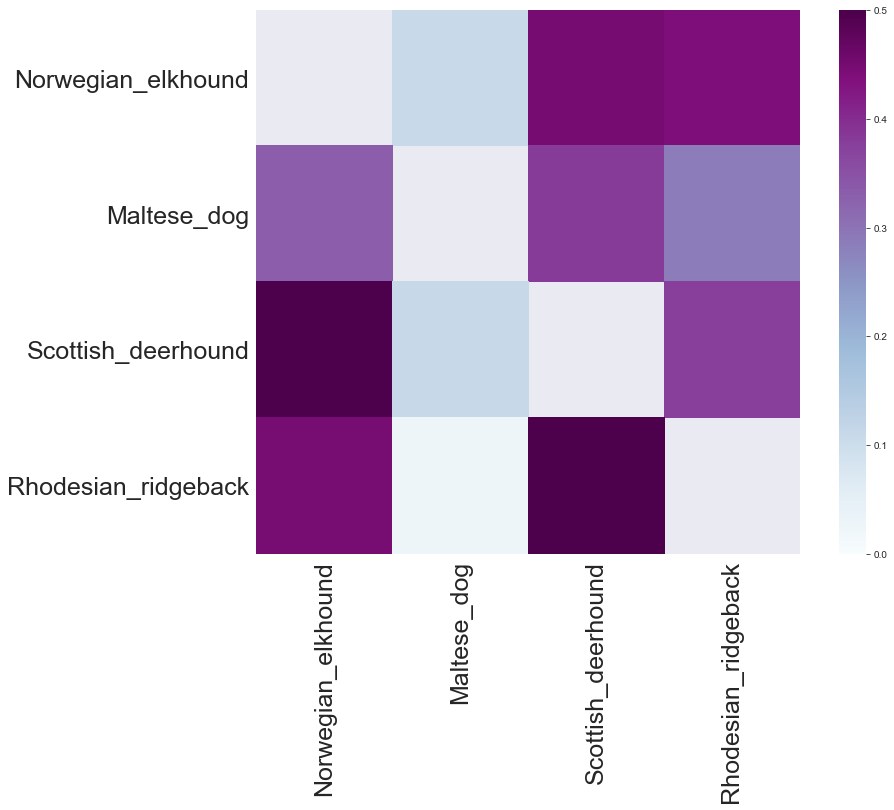

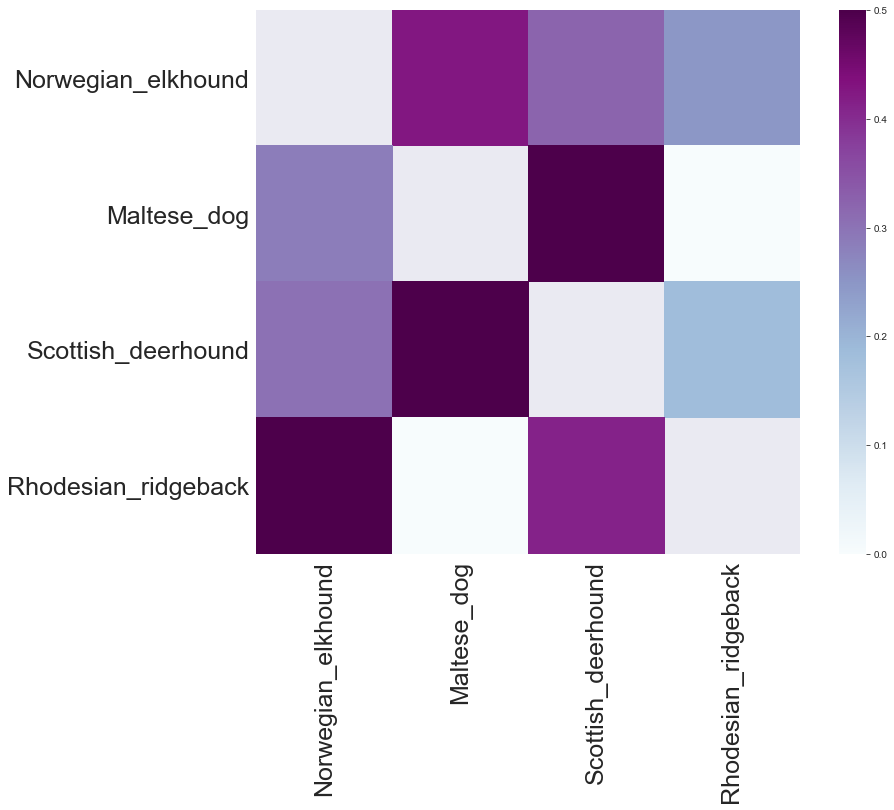

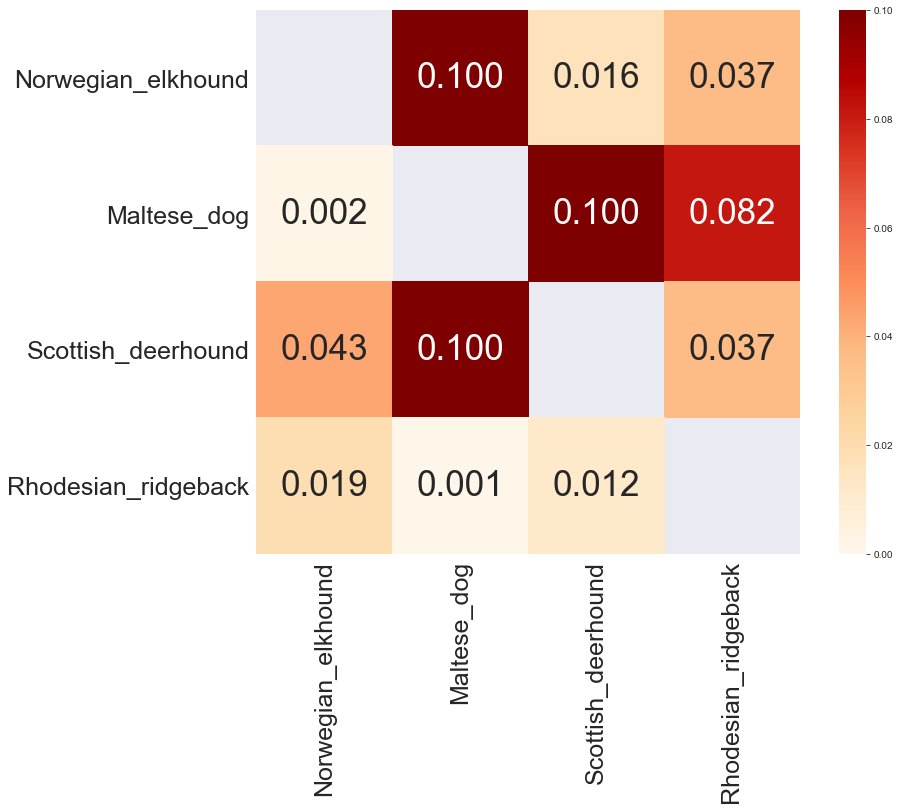

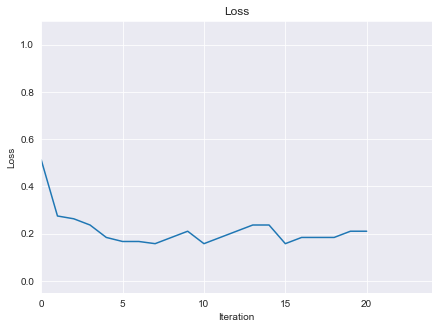

In [8]:
cp.show_anchors=True
cp.anchors_plot_sns_separate(1, True)